In [46]:
!pip install graphviz
import numpy as np 
import pandas as pd 
from sklearn import tree
import graphviz
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

In [88]:
df= pd.read_csv('D:\Linux\Sem_5\DA\Project\Adult.csv',sep = ',')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [89]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [90]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [91]:
df.replace('?',np.nan )

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [92]:
#percentage of missing data
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
income,0,0.0
native.country,0,0.0
hours.per.week,0,0.0
capital.loss,0,0.0
capital.gain,0,0.0


In [93]:
#df['occupation'].describe()
#df['occupation'].replace('?','Prof-specialty')
occupation = []
for i in df["occupation"]:
    if i == '?':
        occupation.append("Prof-specialty")
    else:
        occupation.append(i)
df["occupation"] = occupation

In [94]:
#df['workclass'].replace('?','Private')
#df['workclass'].describe()
workclass = []
for i in df["workclass"]:
    if i == '?':
        workclass.append("Private")
    else:
        workclass.append(i)
df["workclass"] = workclass

In [95]:
#df['native.country'].replace('?','United-States')
nativecountry = []
for i in df["workclass"]:
    if i == '?':
        nativecountry.append("United-States")
    else:
        nativecountry.append(i)
df["native.country"] = nativecountry

In [96]:
income = df["income"]
df.drop(["income"],axis=1)
gender = []
for i in df["sex"]:
  if i == 'Female':
    gender.append(0)
  else:
    gender.append(1)
df["gender"] = gender
df["income"] = income

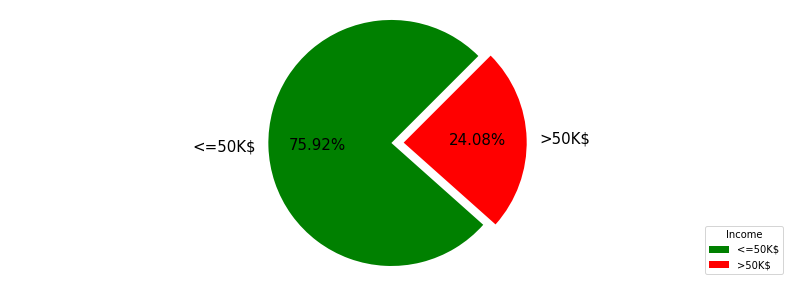

In [97]:
labels = df['income'].value_counts()
w = (list(labels.index), list(labels.values))
fig = plt.figure(figsize = (14,5))
Explode = [0,0.1]
plt.pie(w[1],explode=Explode,labels=["<=50K$",">50K$"],shadow=False,startangle=45,
 colors=['green','red'],autopct='%.2f%%',textprops={'fontsize': 15})
plt.axis('equal')
plt.legend(title='Income',loc='lower right')
plt.show()

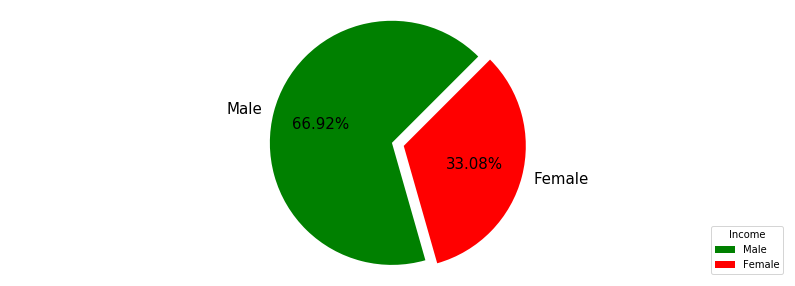

In [98]:
labels = df['sex'].value_counts()
w = (list(labels.index), list(labels.values))
fig = plt.figure(figsize = (14,5))
Explode = [0,0.1]
plt.pie(w[1],explode=Explode,labels=["Male","Female"],shadow=False,startangle=45,
 colors=['green','red'],autopct='%.2f%%',textprops={'fontsize': 15})
plt.axis('equal')
plt.legend(title='Income',loc='lower right')
plt.show()

['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']


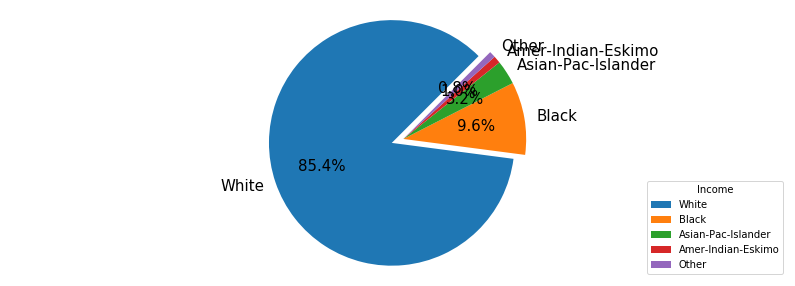

In [99]:
labels = df['race'].value_counts()
w = (list(labels.index), list(labels.values))
fig = plt.figure(figsize = (14,5))
print(w[0])
plt.pie(w[1],labels=w[0],explode=[0.1,0,0,0,0],shadow=False,startangle=45,autopct='%.01f%%',textprops={'fontsize': 15})
plt.axis('equal')
plt.legend(title='Income',loc='lower right')
plt.show()

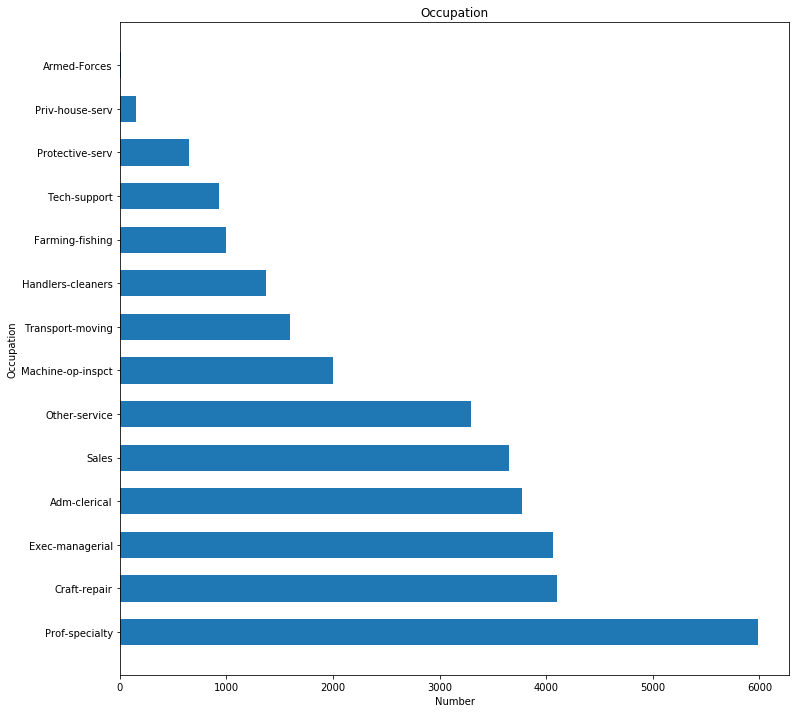

In [100]:
labels = df['occupation'].value_counts()
w = (list(labels.index), list(labels.values))
plt.barh(w[0],height=0.6,width=w[1])
plt.ylabel("Occupation")
plt.xlabel("Number")
plt.title("Occupation")
plt.show()

In [101]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,gender
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810,0.669205
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581,0.470506
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000,1.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000,1.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B4EDE14D48>,
      dtype=object)

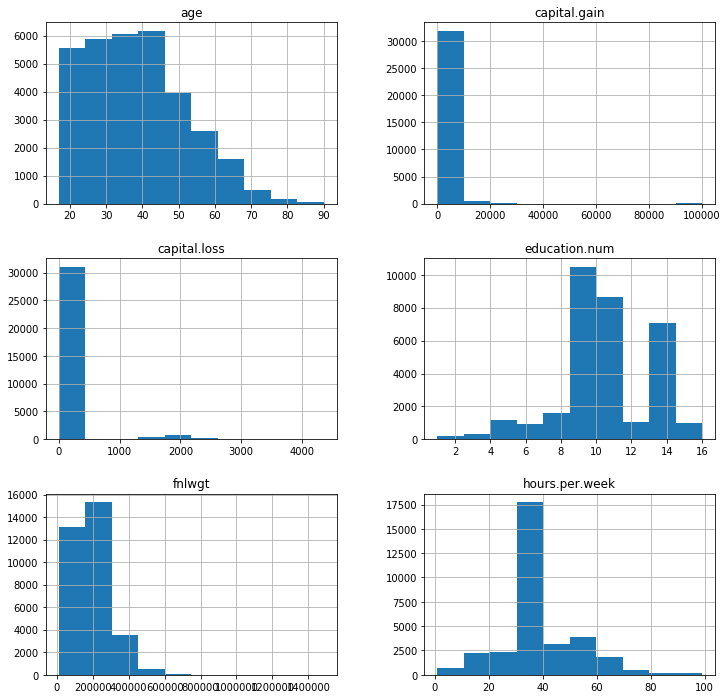

In [102]:
rcParams['figure.figsize'] = 12, 12
df[['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']].hist()

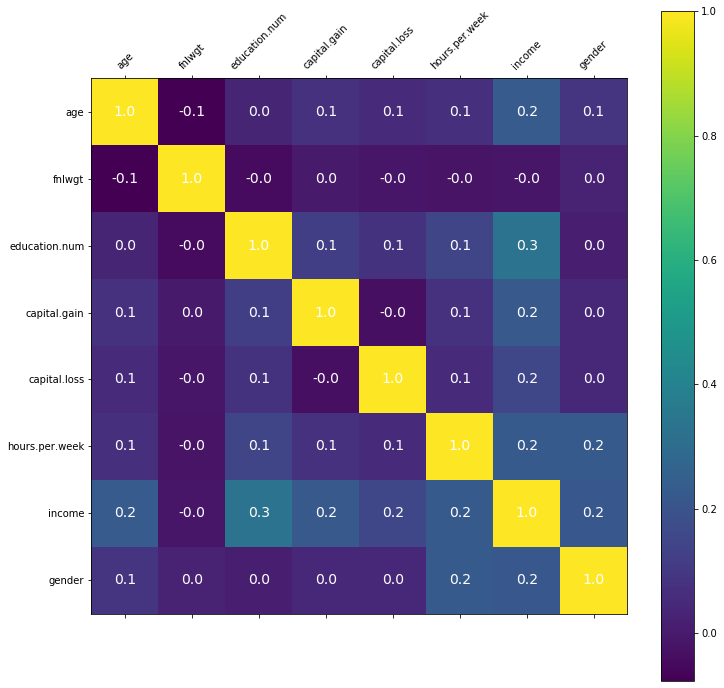

In [103]:
plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

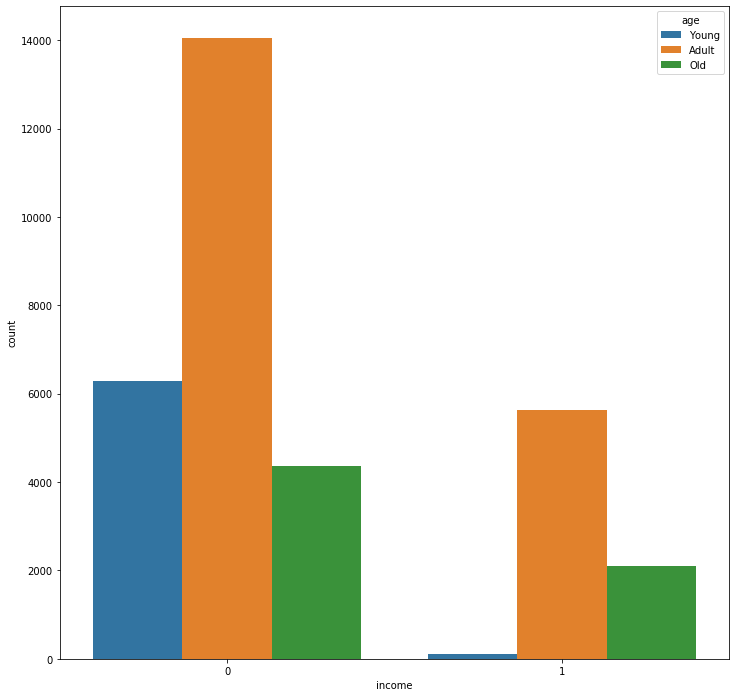

In [104]:
df['age'] = pd.cut(df['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])
sns.countplot(x = 'income', hue = 'age', data = df)

In [105]:
df['Capital Diff'] = df['capital.gain'] - df['capital.loss']
df.drop(['capital.gain'], axis = 1, inplace = True)
df.drop(['capital.loss'], axis = 1, inplace = True)

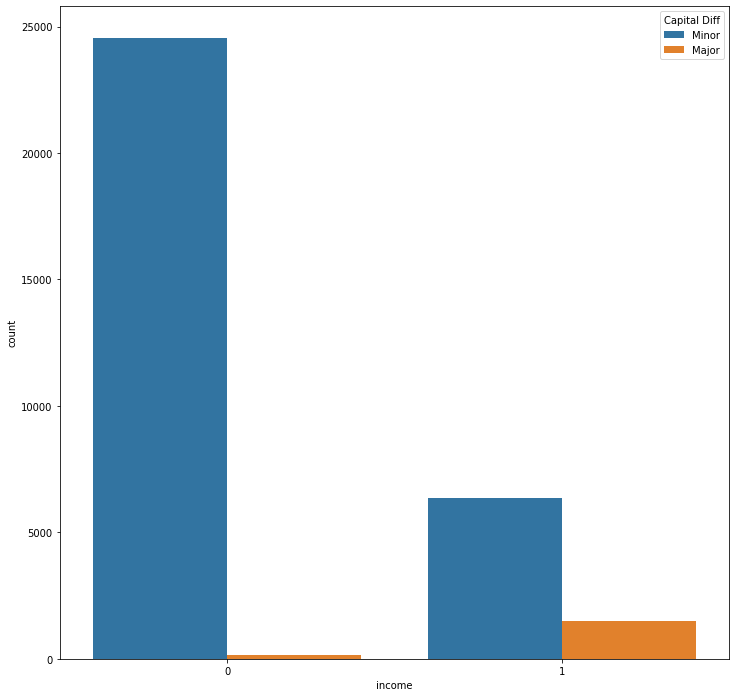

In [106]:
df['Capital Diff'] = pd.cut(df['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'income', hue = 'Capital Diff', data = df)

In [107]:
df['Hours per Week'] = pd.cut(df['hours.per.week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

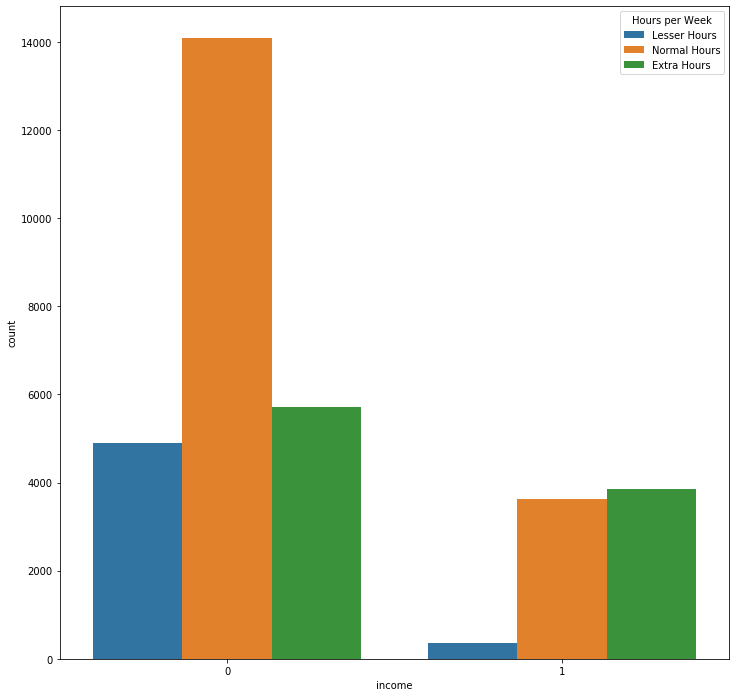

In [108]:
sns.countplot(x = 'income', hue = 'Hours per Week', data = df)

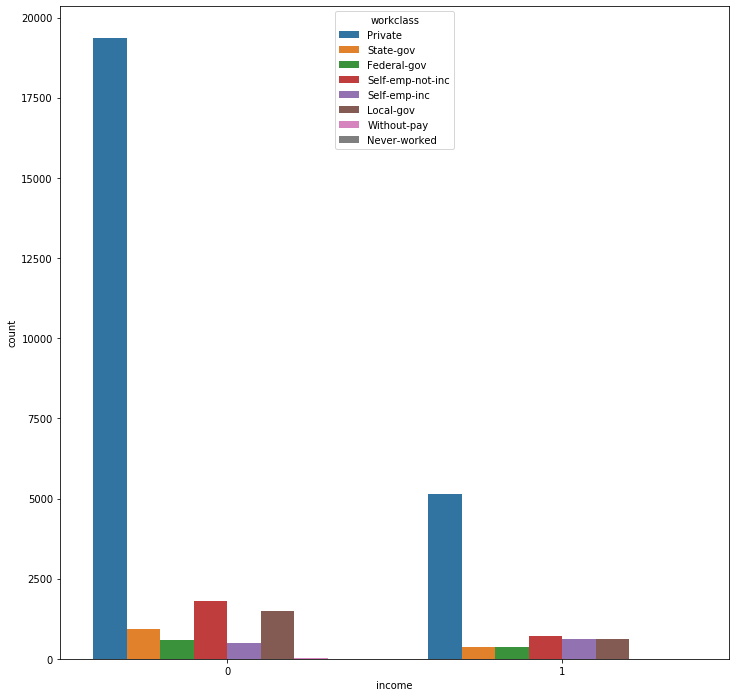

In [109]:
sns.countplot(x = 'income', hue = 'workclass', data = df)

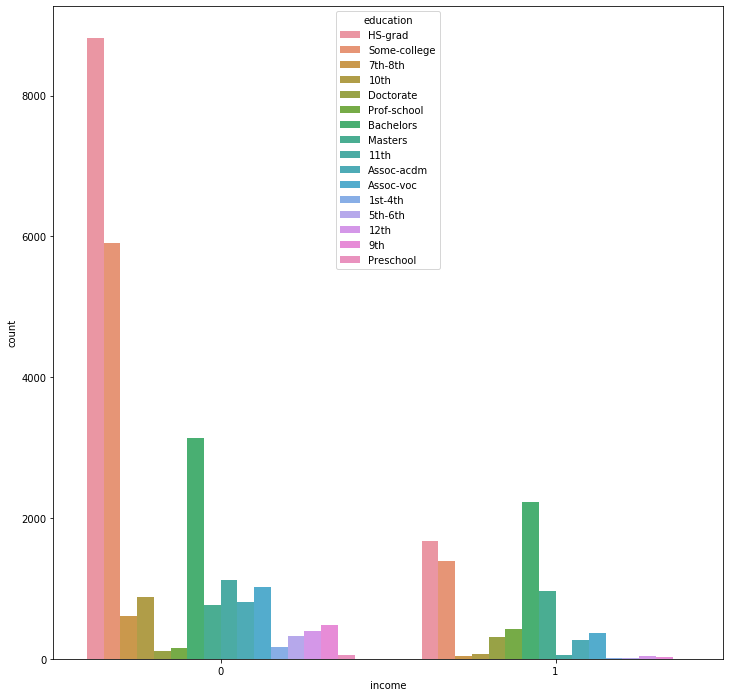

In [110]:
sns.countplot(x = 'income', hue = 'education', data = df)

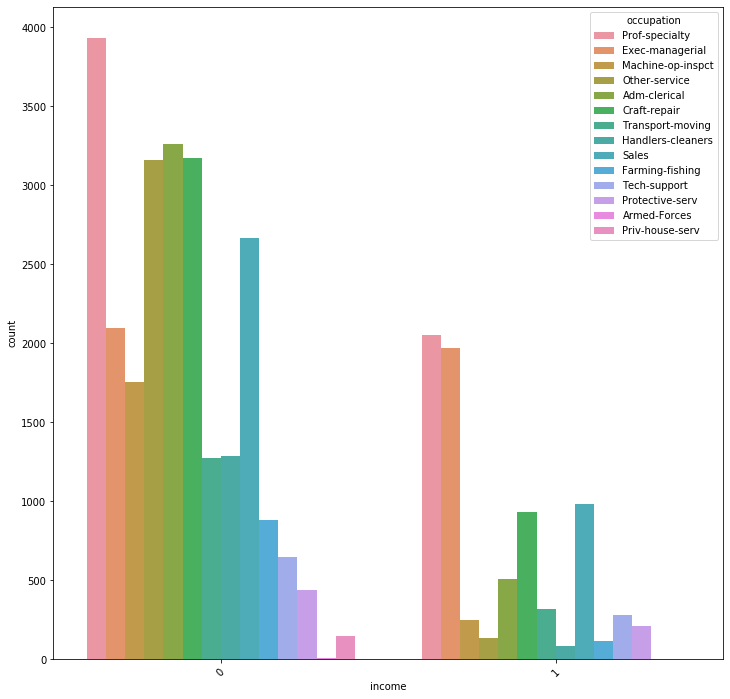

In [111]:
plt.xticks(rotation = 45)
sns.countplot(x = 'income', hue = 'occupation', data = df)

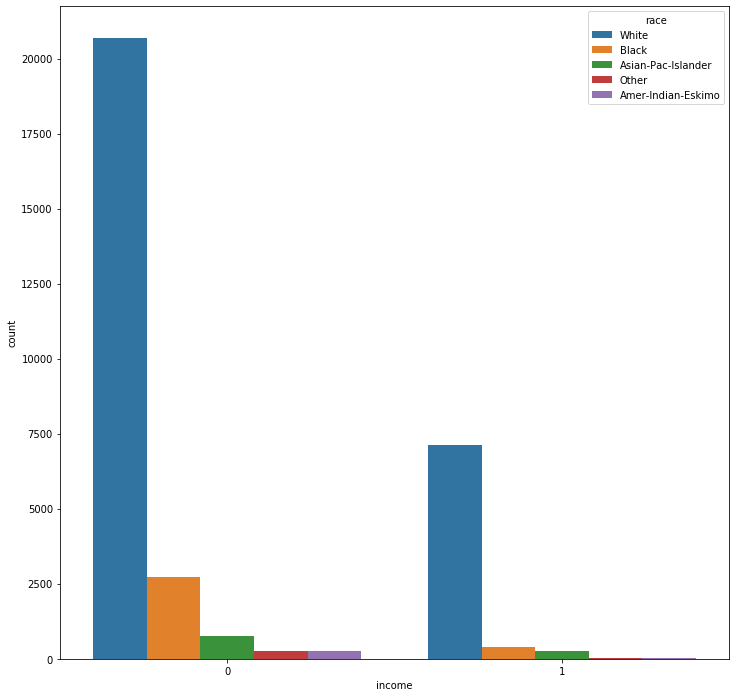

In [112]:
sns.countplot(x = 'income', hue = 'race', data = df)
plt.savefig('D:\p1.png')

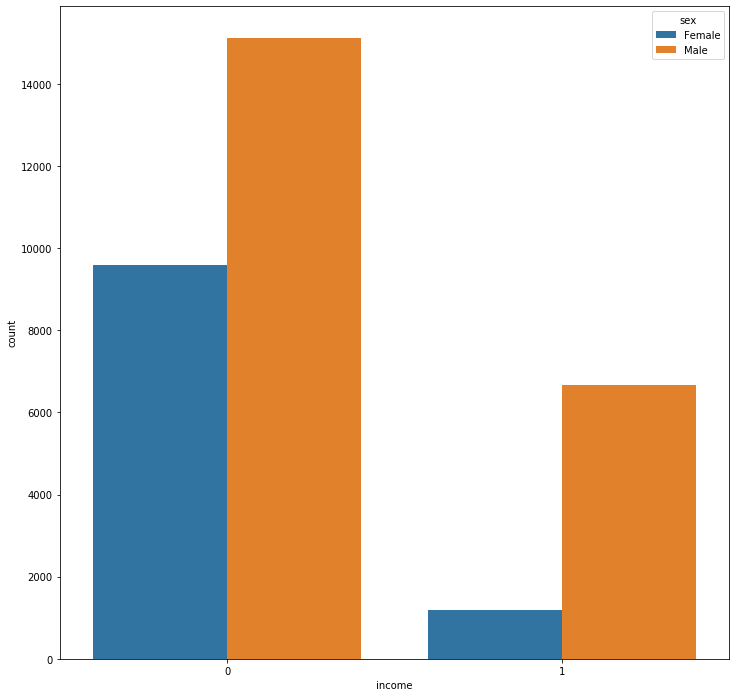

In [113]:
sns.countplot(x = 'income', hue = 'sex', data = df)

In [114]:
countries = np.array(df['native.country'].unique())
countries = np.delete(countries, 0)

In [115]:
df['native.country'].replace(countries, 'Other', inplace = True)
df['native.country'].replace(countries, 'Other', inplace = True)

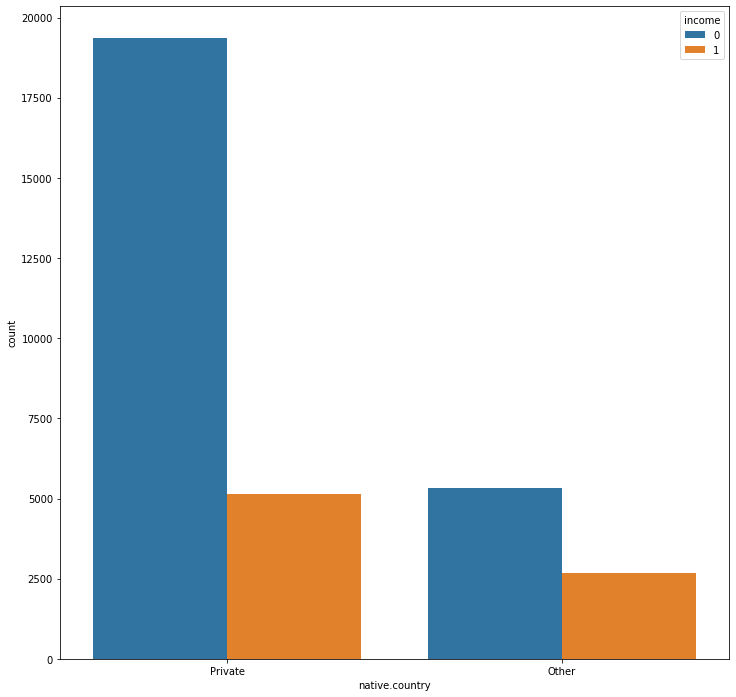

In [116]:
sns.countplot(x = 'native.country', hue = 'income', data = df)